# Who should you take in the NFL draft? - QB Edition

## Quarterback -- in preparation 


In this notebook I attempt at predicting who will be a probowl quarterback based on Combine metrics. Let's see if it works..

In [43]:
import pandas as pd
import numpy as np

from sklearn.cross_validation import cross_val_score
from sklearn import linear_model, ensemble, decomposition
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
sns.set()

from imblearn.over_sampling import SMOTE

%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

%config InlineBackend.figure_format='retina'
matplotlib.rcParams['figure.figsize'] = (8.0, 5.0)
plt.style.use('ggplot')

In [83]:
df = pd.read_csv('/Users/richard/data/NFL.csv', index_col='idx')

In [84]:
df_qb = df[df['Pos'] == 'QB']

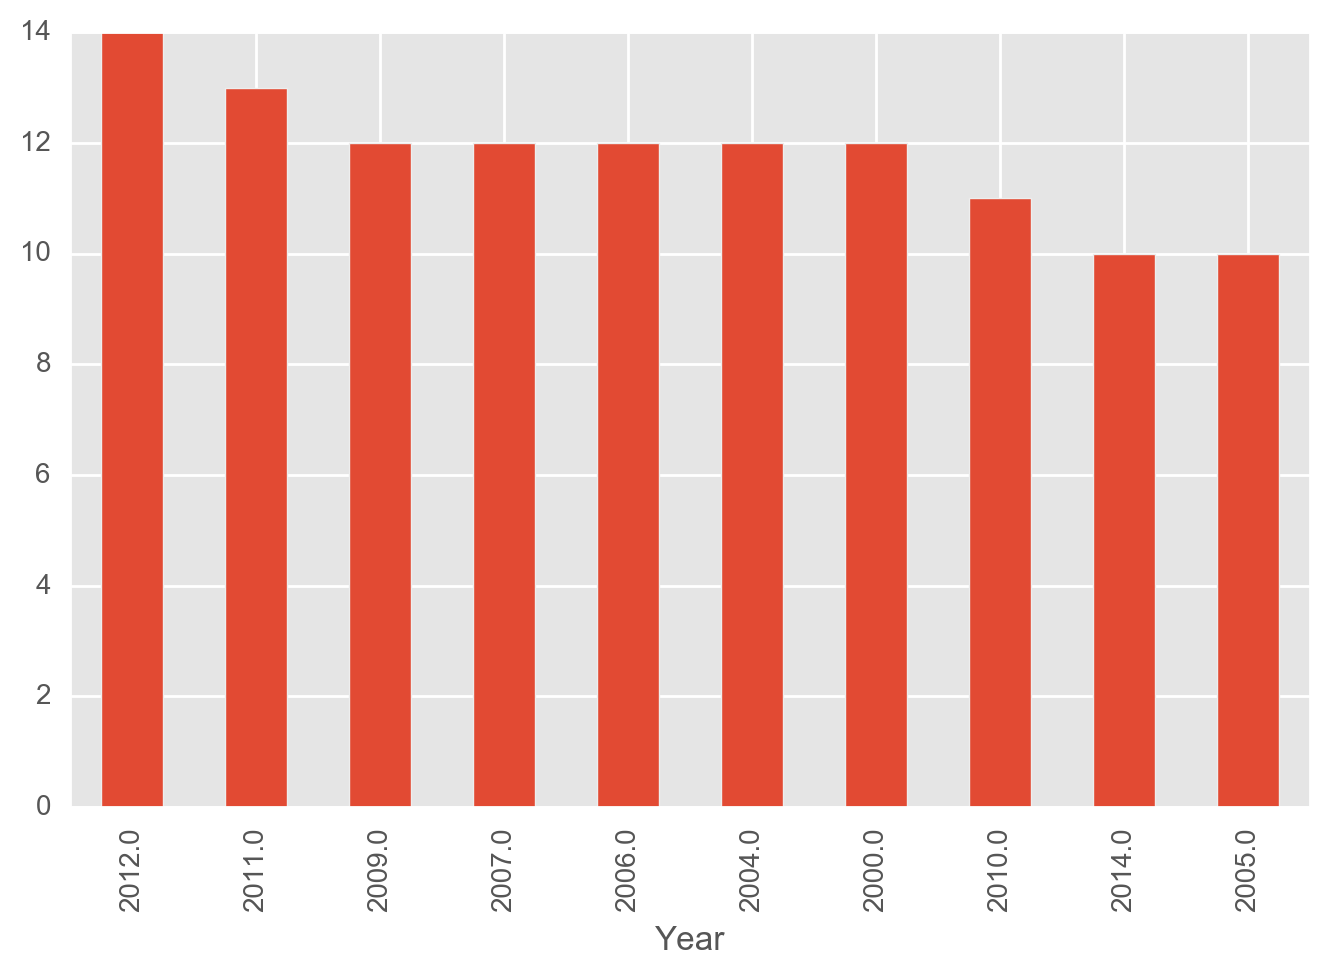

In [66]:
df_qb.groupby('Year').size().sort_values(ascending=False).head(n=10).plot(kind='bar');

How many made it to the probowl?

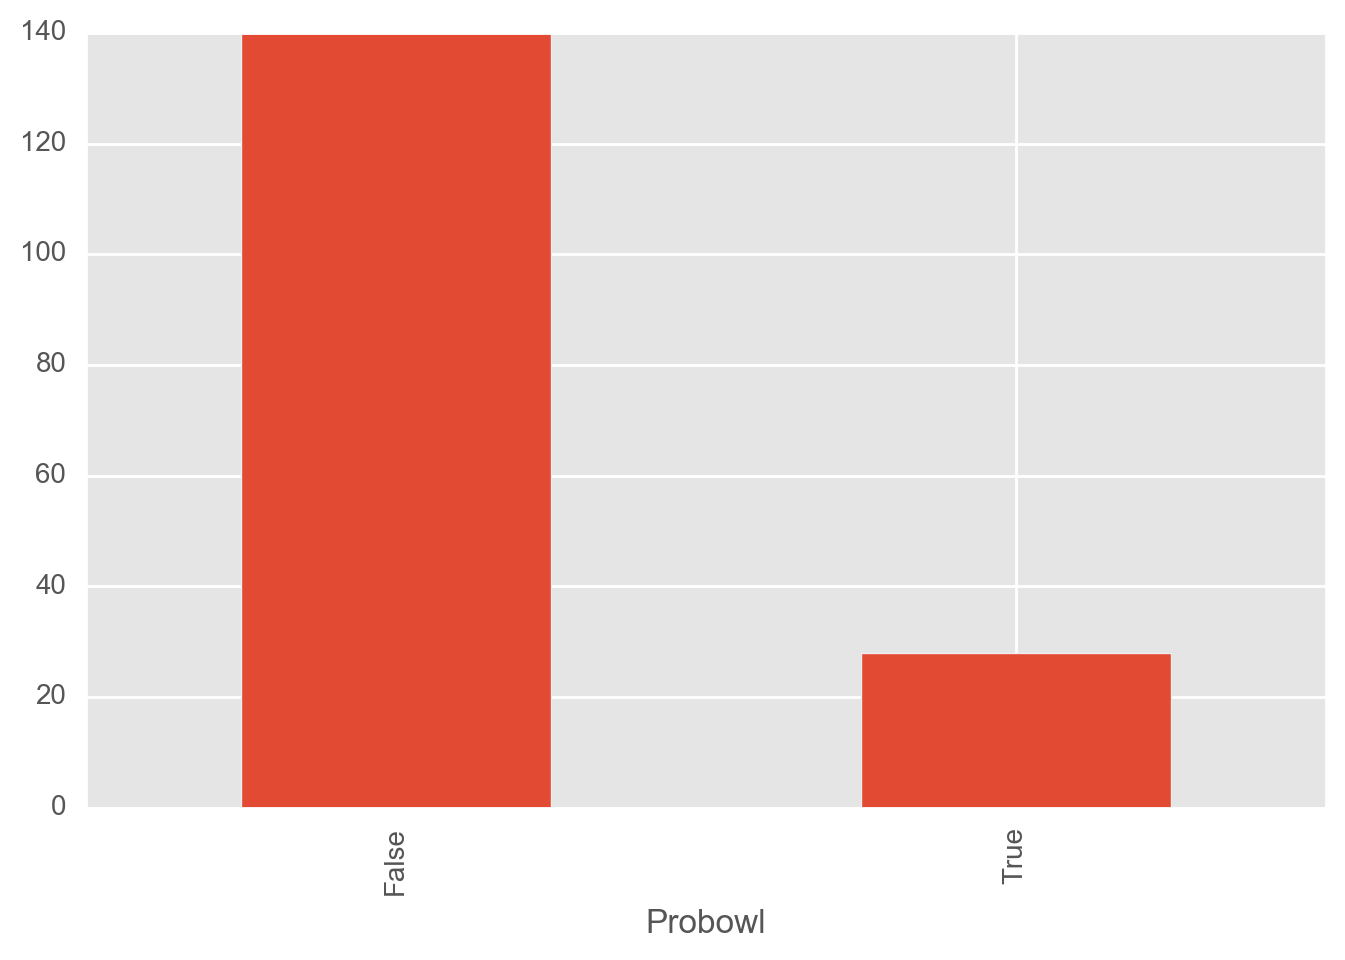

In [67]:
df_qb.groupby('Probowl').size().sort_values(ascending=False).head(n=10).plot(kind='bar');

21 players out of 140 made it to the probowl. Not enough data..!

In [144]:
cutoff_year = 2003
important_cols = ['Wt', '40YD', 'Height_inches', 'Probowl']
df = df_qb

df_train   = df[(df['Year'] > cutoff_year) & (df['Year'] < 2010)]
df_test    = df[df['Year'] <= cutoff_year]

df_train = df_train[important_cols].dropna()
df_test  = df_test[important_cols].dropna()

X_train = df_train.drop('Probowl',1)
X_test  = df_test.drop('Probowl',1)

y_train = df_train.Probowl
y_test = df_test.Probowl

print(len(y_train), len(y_test))

66 42


The naive prediction would be:

In [145]:
1 - df_train.groupby('Probowl').size()[1]/df_train.groupby('Probowl').size()[0]

0.80000000000000004

In [146]:
lr = linear_model.LogisticRegression()
rf = ensemble.RandomForestClassifier(n_jobs=8)
scores = cross_val_score(rf, X_train, y_train, cv = 10, scoring='f1_weighted')
print(np.round(scores,2))

[ 0.53  0.87  0.79  0.71  0.79  0.67  0.76  0.76  0.76  0.76]


In [147]:
rf.fit(X_train, y_train)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=8,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [148]:
arr = np.zeros((len(y_test),4))

arr[:,0] = np.array(np.round(rf.predict_proba(X_test)[:,0],2))
arr[:,1] = np.array(np.round(rf.predict_proba(X_test)[:,1],2))
arr[:,2] = np.array(rf.predict(X_test))
arr[:,3] = np.array(y_test)

results = pd.DataFrame(arr, columns=['non probowl prob', 'probowl prob', 'prediction', 'actual'])

results.sort('actual', ascending=False)

,non probowl prob,probowl prob,prediction,actual
0,1.0,0.0,0.0,1.0
2,0.9,0.1,0.0,1.0
39,0.9,0.1,0.0,1.0
29,0.9,0.1,0.0,1.0
15,1.0,0.0,0.0,1.0
33,1.0,0.0,0.0,1.0
12,1.0,0.0,0.0,1.0
31,0.7,0.3,0.0,0.0
25,0.9,0.1,0.0,0.0
26,0.6,0.4,0.0,0.0


Looks like we may need to oversample or undersample categorical data here. To be continued..